## Karate Club partition

## KarateClubProblem

In [3]:
from QHyper.problems.karate_club import KarateClubProblem


karate_club_problem = KarateClubProblem()

### DQM

#### dqm.solve() - use objective function as sympy expr. in converter.to_dqm

In [4]:
from QHyper.solvers.dqm import DQM


karate_dqm = DQM(karate_club_problem, time=5)
karate_sampleset = karate_dqm.solve()

In [5]:
sample = karate_sampleset.first.sample
energy = karate_sampleset.first.energy
run_time = (karate_sampleset.info["run_time"]) * 0.001

In [6]:
from matplotlib import pyplot as plt
import networkx as nx


COLORS = {
    0: "blue",
    1: "red",
    2: "#2a401f",
    3: "#cce6ff",
    4: "pink",
    5: "#4ebd1a",
    6: "#66ff66",
    7: "yellow",
    8: "#0059b3",
    9: "#703243",
    10: "green",
    11: "black",
    12: "#3495eb",
    13: "#525c4d",
    14: "#1aff1a",
    15: "brown",
    16: "gray",
}


def get_communities_from_sample(sample):
    communities = []
    for k in range(karate_club_problem.num_cases):
        comm = []
        for i in sample:
            if sample[i] == k:
                comm.append(i)
        communities.append(set(comm))

    return communities


def draw_communities(sample):
    color_map = []

    for node in karate_club_problem.G:  # 1, 2, 3
        color_map.append(COLORS[sample["x" + str(node)]])
    f = plt.figure()

    nx.draw(
        karate_club_problem.G,
        node_color=color_map,
        with_labels=True,
        ax=f.add_subplot(111),
    )


def draw_communities_from_graph(sample):
    color_map = []

    for node in karate_club_problem.G:  # 1, 2, 3
        color_map.append(COLORS[sample[node]])
    f = plt.figure()

    nx.draw(
        karate_club_problem.G,
        node_color=color_map,
        with_labels=True,
        ax=f.add_subplot(111),
    )


def get_clustering_difference(qa_communities, lcda_communities):
    print(lcda_communities[0].difference(qa_communities[0]))
    print(qa_communities[0].difference(lcda_communities[0]))
    print(lcda_communities[1].difference(qa_communities[1]))
    print(qa_communities[1].difference(lcda_communities[1]))

    print(lcda_communities[0].difference(qa_communities[1]))
    print(qa_communities[1].difference(lcda_communities[0]))
    print(lcda_communities[1].difference(qa_communities[0]))
    print(qa_communities[0].difference(lcda_communities[1]))

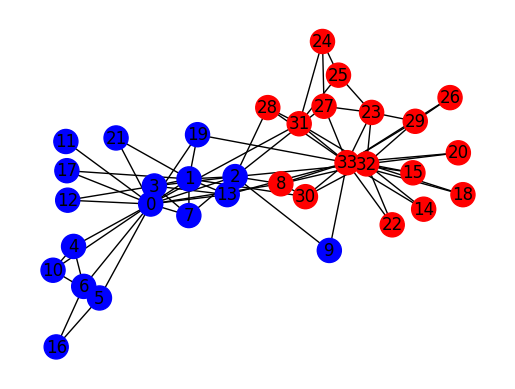

In [9]:
qa_communities = get_communities_from_sample(sample)
draw_communities(sample)

In [10]:
lcda_communities_xs = [
    {"x" + str(n) for n in cluster} for cluster in lcda_communities
]

get_clustering_difference(qa_communities, lcda_communities_xs)

set()
{'x9'}
{'x9'}
set()
{'x2', 'x5', 'x7', 'x12', 'x11', 'x21', 'x19', 'x16', 'x17', 'x1', 'x13', 'x4', 'x3', 'x6', 'x0', 'x10'}
{'x29', 'x14', 'x25', 'x24', 'x33', 'x28', 'x15', 'x22', 'x18', 'x23', 'x20', 'x8', 'x27', 'x32', 'x31', 'x30', 'x26'}
{'x29', 'x14', 'x25', 'x24', 'x33', 'x28', 'x15', 'x22', 'x18', 'x23', 'x8', 'x20', 'x27', 'x32', 'x31', 'x30', 'x26'}
{'x2', 'x5', 'x7', 'x12', 'x11', 'x21', 'x19', 'x16', 'x17', 'x1', 'x13', 'x4', 'x3', 'x6', 'x0', 'x10'}


#### dqm.solve_from_graph() - use graph iteration instead of sympy expr. in converter.to_dqm

In [11]:
karate_sampleset_from_graph = karate_dqm.solve_from_graph()

In [12]:
sample_fg = karate_sampleset_from_graph.first.sample
energy_fg = karate_sampleset_from_graph.first.energy
run_time_fg = (karate_sampleset_from_graph.info["run_time"]) * 0.001

In [13]:
qa_communities_fg = get_communities_from_sample(sample_fg)

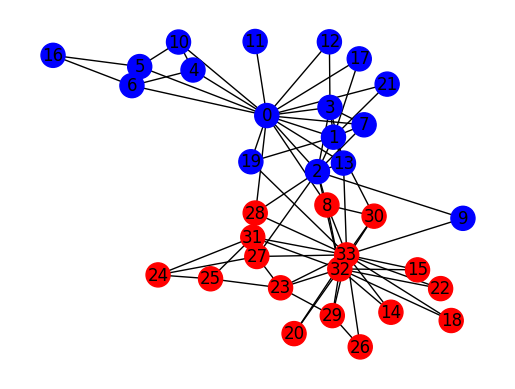

In [15]:
qa_communities_fg = get_communities_from_sample(sample_fg)
draw_communities_from_graph(sample_fg)

In [16]:
get_clustering_difference(qa_communities_fg, lcda_communities)

set()
{9}
{9}
set()
{0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}
{32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}
{32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}
{0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}


#### The same results obtained with .to_dqm() and .to_dqm_from_graph()

In [16]:
qa_communities_fg_xs = [
    {"x" + str(n) for n in cluster} for cluster in qa_communities_fg
]
get_clustering_difference(qa_communities_fg_xs, qa_communities)

set()
set()
set()
set()
{'x5', 'x9', 'x6', 'x17', 'x10', 'x2', 'x4', 'x16', 'x0', 'x13', 'x19', 'x12', 'x3', 'x11', 'x1', 'x21', 'x7'}
{'x18', 'x27', 'x14', 'x30', 'x23', 'x33', 'x24', 'x25', 'x15', 'x20', 'x28', 'x22', 'x26', 'x32', 'x29', 'x8', 'x31'}
{'x18', 'x27', 'x14', 'x30', 'x23', 'x24', 'x25', 'x33', 'x15', 'x20', 'x28', 'x22', 'x26', 'x32', 'x29', 'x8', 'x31'}
{'x5', 'x9', 'x6', 'x17', 'x10', 'x2', 'x4', 'x16', 'x0', 'x13', 'x19', 'x12', 'x3', 'x11', 'x1', 'x21', 'x7'}


No differences (set()) => objective function seems to be defined correctly.

### CQM

In [17]:
from QHyper.solvers.cqm import CQM


karate_cqm = CQM(karate_club_problem, time=5)
karate_cqm_sample = karate_cqm.solve()

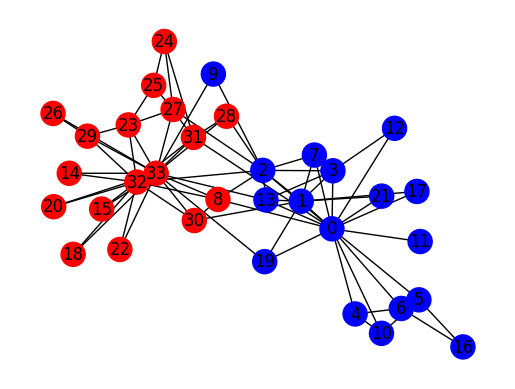

In [18]:
qa_communities_cqm = get_communities_from_sample(karate_cqm_sample)
draw_communities(karate_cqm_sample)

In [19]:
get_clustering_difference(qa_communities_cqm, lcda_communities_xs)

set()
{'x9'}
{'x9'}
set()
{'x2', 'x5', 'x7', 'x12', 'x11', 'x21', 'x19', 'x16', 'x17', 'x1', 'x13', 'x4', 'x3', 'x6', 'x0', 'x10'}
{'x29', 'x14', 'x25', 'x24', 'x33', 'x28', 'x15', 'x22', 'x18', 'x23', 'x20', 'x27', 'x32', 'x8', 'x31', 'x30', 'x26'}
{'x29', 'x14', 'x25', 'x24', 'x33', 'x28', 'x15', 'x22', 'x18', 'x23', 'x8', 'x20', 'x27', 'x32', 'x31', 'x30', 'x26'}
{'x12', 'x5', 'x2', 'x21', 'x11', 'x7', 'x19', 'x16', 'x17', 'x1', 'x13', 'x3', 'x4', 'x6', 'x0', 'x10'}


#### The same results obtained with .to_dqm() and .to_cqm() (and .to_dqm_from_graph() as well)

In [20]:
get_clustering_difference(qa_communities_cqm, qa_communities)

set()
set()
set()
set()
{'x5', 'x9', 'x6', 'x17', 'x10', 'x2', 'x4', 'x16', 'x0', 'x13', 'x19', 'x12', 'x3', 'x11', 'x1', 'x21', 'x7'}
{'x18', 'x27', 'x14', 'x30', 'x23', 'x24', 'x25', 'x33', 'x15', 'x20', 'x28', 'x22', 'x26', 'x32', 'x29', 'x8', 'x31'}
{'x18', 'x27', 'x14', 'x30', 'x23', 'x24', 'x25', 'x33', 'x15', 'x20', 'x28', 'x22', 'x26', 'x32', 'x29', 'x8', 'x31'}
{'x5', 'x9', 'x6', 'x17', 'x10', 'x2', 'x4', 'x16', 'x0', 'x13', 'x19', 'x12', 'x3', 'x11', 'x1', 'x21', 'x7'}


No differences (set()) => objective function seems to be defined correctly.